################数据分布分析#####################
#################1.分布分析#######################

对于定量数据选择组数和组宽是最主要问题，按照以下步骤进行
#### 1.求极差   极差=最大值-最小值
#### 2.决定组距和组数 组数=极差/组距  组距需要根据业务需要进行定义   确定组数公式：K=1+3.32*Log(N) N为数据总数  组距的确定：，K：K=1+lgn/lg2 n为数据样本的数量
#### 3.决定分点
#### 4.列出频率分布表
#### 5.绘制频率分布直方图



In [1]:
data_group=[i for i in range(500,5000,500)] #组距的确定，K：K=1+lgn/lg2 n为数据样本的数量

In [2]:
data_group

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

In [34]:
import pandas as pd  #导入pandas，为数据处理的一个库

In [35]:
inputfile="C:\D\software\Python\Study\数据挖掘\Python数据分析与挖掘实战\chapter4\demo\data\catering_sale.xls" #设置数据路径

In [36]:
data=pd.read_excel(inputfile,index_col=u'日期')#读取Excel文件中的数据，并设置索引列

In [6]:
data['group']=pd.cut(data.销量,data_group)

In [8]:
data.groupby('group').count()

,销量
group,
"(500, 1000]",1
"(1000, 1500]",0
"(1500, 2000]",1
"(2000, 2500]",53
"(2500, 3000]",87
"(3000, 3500]",44
"(3500, 4000]",7
"(4000, 4500]",2


In [26]:
import matplotlib.pyplot as plt

In [9]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


In [37]:
new_data=data.interpolate()

In [57]:
result=new_data[((new_data[u'销量'])>1500)&((new_data[u'销量'])<4500)]

In [10]:
import math

In [13]:
1+(math.log(201))/(math.log(2))

8.651051691178928

In [38]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [150]:
num_bins = 9

In [162]:
n, bins, patches = plt.hist(result[u'销量'], num_bins,range=[1750,4000], cumulative=False,normed=0, facecolor='blue', alpha=1,edgecolor='black')

In [167]:
mu = n.mean()# mean of distribution
sigma = n.std() # standard deviation of distribution
x =np.random.normal(mu,sigma,10)

In [168]:
#y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins,x, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

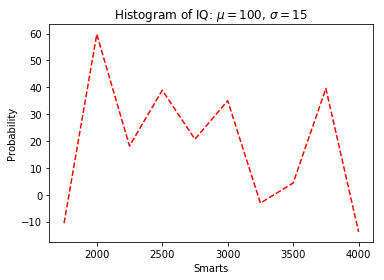

In [169]:
plt.subplots_adjust(left=0.15)
plt.show()

In [166]:
print(n,bins,patches)

[  1.  13.  40.  55.  33.  29.  15.   6.   1.] [ 1750.  2000.  2250.  2500.  2750.  3000.  3250.  3500.  3750.  4000.] <a list of 9 Patch objects>


In [67]:
from scipy.stats import kstest#导入正态分布检验函数

In [68]:
kstest(result[u'销量'],'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [158]:
print(x)

[ 26.43064676 -74.0076303  -27.99924819  99.2718671   46.30818295
  54.97227371 -40.89882519 -89.14621599 -27.59603667  86.37739531]
